# Taller 2

## SPCA

El paper reformula PCA como un problema de regresión para luego introducir penalizaciones de dispersión.

### Aproximaciones Directas Dispersas (Sección 3.1)

Esta es una aproximación en dos etapas.

**Teorema 1 (PCA como Regresión Ridge)**

Sea $ \mathbf{Z}_i = \mathbf{U}_i D_{ii} $ el $ i $-ésimo componente principal. Para $ \lambda > 0 $, los estimadores Ridge $ \hat{\boldsymbol{\beta}}_{\text{ridge}} $ dados por:

$$\hat{\boldsymbol{\beta}}_{\text{ridge}} = \arg\min_{\boldsymbol{\beta}} \| \mathbf{Z}_i - \mathbf{X}\boldsymbol{\beta} \|_2^2 + \lambda \|\boldsymbol{\beta}\|_2^2 $$

cumplen que $ \hat{\boldsymbol{\beta}}_{\text{ridge}} / \|\hat{\boldsymbol{\beta}}_{\text{ridge}}\|_2 = \mathbf{V}_i $ (el $ i $-ésimo vector de loadings de PCA).

Con base en esto, se puede obtener una aproximación dispersa $ \tilde{\mathbf{V}}_i $ al $ i $-ésimo vector de loadings $ \mathbf{V}_i $ resolviendo:

$$\hat{\boldsymbol{\beta}} = \arg\min_{\boldsymbol{\beta}} \| \mathbf{Z}_i - \mathbf{X}\boldsymbol{\beta} \|_2^2 + \lambda \|\boldsymbol{\beta}\|_2^2 + \gamma \|\boldsymbol{\beta}\|_1 $$

y luego normalizando $ \tilde{\mathbf{V}}_i = \hat{\boldsymbol{\beta}} / \|\hat{\boldsymbol{\beta}}\|_2 $. Aquí, $ \gamma $ es la penalización $ L_1 $.

### Componentes Principales Dispersos Basados en el Criterio SPCA (Sección 3.2)

Este es el enfoque principal y unificado. Se busca una matriz de scores $ \mathbf{A} \in \mathbb{R}^{n \times k} $ y una matriz de loadings $ \mathbf{B} \in \mathbb{R}^{p \times k} $.

**Teorema 2 (Primer CP como Regresión)**

Para $ \lambda > 0 $, sean $ (\hat{\boldsymbol{\alpha}}, \hat{\boldsymbol{\beta}}) $ la solución al problema de optimización:

$$(\hat{\boldsymbol{\alpha}}, \hat{\boldsymbol{\beta}}) = \arg\min_{\boldsymbol{\alpha}, \boldsymbol{\beta}} \sum_{i=1}^n \| \mathbf{x}_i^T - \alpha_i \boldsymbol{\beta}^T \|_2^2 + \lambda \|\boldsymbol{\beta}\|_2^2 \quad \text{sujeto a } \|\boldsymbol{\alpha}\|_2^2 = 1 $$

donde $ \mathbf{x}_i^T $ es la $ i $-ésima observación (fila de $ \mathbf{X} $), $ \boldsymbol{\alpha} \in \mathbb{R}^n $ es el vector de scores, y $ \boldsymbol{\beta} \in \mathbb{R}^p $ es el vector de loadings. Entonces, $ \hat{\boldsymbol{\beta}} $ es proporcional a $ \mathbf{V}_1 $ (el primer vector de loadings de PCA).

*Definiciones para el Teorema 2:*

- $ \mathbf{x}_i^T $: La $ i $-ésima observación (fila de $ \mathbf{X} $), un vector de $ p $ dimensiones.
- $ \alpha_i $: El $ i $-ésimo elemento del vector de scores $ \boldsymbol{\alpha} $. Representa la coordenada de la $ i $-ésima observación en la nueva dimensión (componente).
- $ \boldsymbol{\beta} $: El vector de loadings de $ p $ dimensiones. Define la dirección del componente en el espacio original de variables.
- $ \alpha_i \boldsymbol{\beta}^T $: Reconstrucción de la $ i $-ésima observación usando el componente.
- $ \sum_{i=1}^n \| \mathbf{x}_i^T - \alpha_i \boldsymbol{\beta}^T \|_2^2 $: Error cuadrático de reconstrucción sumado sobre todas las observaciones.
- $ \lambda \|\boldsymbol{\beta}\|_2^2 $: Penalización Ridge sobre los loadings.
- $ \|\boldsymbol{\alpha}\|_2^2 = 1 $: Restricción de normalización para los scores.

**Teorema 3 (Primeros $ k $ CPs como Regresión)**

Para $ \lambda > 0 $, sean $ (\hat{\mathbf{A}}, \hat{\mathbf{B}}) $ la solución al problema de optimización:

$$(\hat{\mathbf{A}}, \hat{\mathbf{B}}) = \arg\min_{\mathbf{A}, \mathbf{B}} \| \mathbf{X} - \mathbf{A}\mathbf{B}^T \|_F^2 + \lambda \sum_{j=1}^k \|\boldsymbol{\beta}_j\|_2^2 \quad \text{sujeto a } \mathbf{A}^T\mathbf{A} = \mathbf{I}_k $$

donde $ \mathbf{A} \in \mathbb{R}^{n \times k} $ es la matriz de scores, $ \mathbf{B} = [\boldsymbol{\beta}_1, \dots, \boldsymbol{\beta}_k] \in \mathbb{R}^{p \times k} $ es la matriz de loadings, y $ \|\cdot\|_F $ es la norma de Frobenius. Entonces, $ \hat{\boldsymbol{\beta}}_j $ es proporcional a $ \mathbf{V}_j $ (el $ j $-ésimo vector de loadings de PCA) para $ j=1, \dots, k $.

*Definiciones para el Teorema 3:*

- $ \mathbf{X} $: Matriz de datos $ n \times p $.
- $ \mathbf{A} $: Matriz de scores $ n \times k $. La columna $ j $ son los scores para el $ j $-ésimo componente.
- $ \mathbf{B} $: Matriz de loadings $ p \times k $. La columna $ j $, $ \boldsymbol{\beta}_j $, son los loadings para el $ j $-ésimo componente.
- $ \mathbf{A}\mathbf{B}^T $: Reconstrucción de la matriz de datos $ \mathbf{X} $ usando $ k $ componentes.
- $ \| \mathbf{X} - \mathbf{A}\mathbf{B}^T \|_F^2 = \operatorname{tr}((\mathbf{X} - \mathbf{A}\mathbf{B}^T)^T(\mathbf{X} - \mathbf{A}\mathbf{B}^T)) $: Error cuadrático total de reconstrucción.
- $ \lambda \sum_{j=1}^k \|\boldsymbol{\beta}_j\|_2^2 $: Suma de penalizaciones Ridge para los loadings de cada componente.
- $ \mathbf{A}^T\mathbf{A} = \mathbf{I}_k $: Restricción de ortonormalidad para las columnas de la matriz de scores $ \mathbf{A} $.

Con base en estos teoremas, el criterio SPCA para $ k $ componentes dispersos se define como:

$$(\hat{\mathbf{A}}, \hat{\mathbf{B}}) = \arg\min_{\mathbf{A}, \mathbf{B}} \| \mathbf{X} - \mathbf{A}\mathbf{B}^T \|_F^2 + \lambda_2 \sum_{j=1}^k \|\boldsymbol{\beta}_j\|_2^2 + \sum_{j=1}^k \lambda_{1,j} \|\boldsymbol{\beta}_j\|_1 \quad \text{sujeto a } \mathbf{A}^T\mathbf{A} = \mathbf{I}_k $$

Aquí, $ \lambda_2 $ es la penalización Ridge y $ \lambda_{1,j} $ es la penalización Lasso para el $ j $-ésimo componente. Se permiten diferentes $ \lambda_{1,j} $ para controlar la dispersión de cada componente.

### Solución Numérica (Sección 3.3) - Algoritmo SPCA

El criterio SPCA se minimiza mediante un algoritmo alternante:

**Algoritmo 1: Algoritmo General SPCA**

1. **Inicialización:** Sea $ \mathbf{A} $ inicializada con las primeras $ k $ columnas de $ \mathbf{U} $ de la SVD de $ \mathbf{X} $ (o los primeros $ k $ loadings de PCA, $ \mathbf{V}_{[,1:k]} $).

2. **Iterar hasta convergencia:**

   a. **Fijar $ \mathbf{A} $, resolver para $ \mathbf{B} $:**

      Para cada $ j = 1, \dots, k $, sea $ \mathbf{y}_j^* = \mathbf{X}^T \boldsymbol{\alpha}_j $ (donde $ \boldsymbol{\alpha}_j $ es la $ j $-ésima columna de $ \mathbf{A} $).

      Los loadings $ \hat{\boldsymbol{\beta}}_j $ para el $ j $-ésimo componente se obtienen resolviendo un problema de regresión Elastic Net. El criterio $ \| \mathbf{X} - \mathbf{A}\mathbf{B}^T \|_F^2 $ se puede reescribir (ver Ecuación 3.10 y 3.11 del paper) para mostrar que, dado $ \mathbf{A} $, optimizar sobre $ \mathbf{B} $ equivale a resolver $ k $ problemas de regresión independientes.

      Específicamente, para cada $ j $:

      $$\hat{\boldsymbol{\beta}}_j = \arg\min_{\boldsymbol{\beta}_j} \| \mathbf{X}\boldsymbol{\alpha}_j - \mathbf{X}\boldsymbol{\beta}_j \|_2^2 + \lambda_2 \|\boldsymbol{\beta}_j\|_2^2 + \lambda_{1,j} \|\boldsymbol{\beta}_j\|_1 $$

      Esto se puede reescribir como (similar a la Ec. 3.13, pero enfocándose en la forma de regresión):

      $$\hat{\boldsymbol{\beta}}_j = \arg\min_{\boldsymbol{\beta}_j} \boldsymbol{\beta}_j^T (\mathbf{X}^T\mathbf{X}) \boldsymbol{\beta}_j - 2 \boldsymbol{\alpha}_j^T (\mathbf{X}^T\mathbf{X}) \boldsymbol{\beta}_j + \lambda_2 \|\boldsymbol{\beta}_j\|_2^2 + \lambda_{1,j} \|\boldsymbol{\beta}_j\|_1 $$

      (El término constante $ \boldsymbol{\alpha}_j^T \mathbf{X}^T\mathbf{X} \boldsymbol{\alpha}_j $ no afecta la optimización).

      El paper muestra que esto es equivalente a un problema de regresión Elastic Net sobre $ \mathbf{y}_j^* = \mathbf{X}\boldsymbol{\alpha}_j $ con predictores $ \mathbf{X} $:

      $$\hat{\boldsymbol{\beta}}_j = \arg\min_{\boldsymbol{\beta}_j} \|\mathbf{X}\boldsymbol{\alpha}_j - \mathbf{X}\boldsymbol{\beta}_j \|_2^2 + \lambda_2 \|\boldsymbol{\beta}_j\|_2^2 + \lambda_{1,j} \|\boldsymbol{\beta}_j\|_1 $$

   b. **Fijar $ \mathbf{B} $, resolver para $ \mathbf{A} $:**

      Ignorar las penalizaciones (que solo dependen de $ \mathbf{B} $). Se minimiza $ \| \mathbf{X} - \mathbf{A}\mathbf{B}^T \|_F^2 $ sujeto a $ \mathbf{A}^T\mathbf{A} = \mathbf{I}_k $.

      Sea $ \mathbf{S} = \mathbf{X}\mathbf{B} $. Se calcula la SVD de $ \mathbf{S} $: $ \mathbf{S} = \tilde{\mathbf{U}}\tilde{\mathbf{D}}\tilde{\mathbf{V}}^T $.

      Entonces, la actualización para $ \mathbf{A} $ es $ \hat{\mathbf{A}} = \tilde{\mathbf{U}}\tilde{\mathbf{V}}^T $. (Esto es una rotación de Procrustes reducida, Teorema 4 del paper).

3. **Normalización:** Los loadings finales para cada componente son $ \tilde{\mathbf{V}}_j = \hat{\boldsymbol{\beta}}_j / \|\hat{\boldsymbol{\beta}}_j\|_2 $.

*Observaciones sobre la implementación:*

- El paso de resolver para $ \mathbf{B} $ (2a) requiere un resolvedor eficiente de Elastic Net (e.g., LARS-EN).
- Si se trabaja con la matriz de covarianza $ \mathbf{\Sigma} = \mathbf{X}^T\mathbf{X}/n $ en lugar de $ \mathbf{X} $, el problema de regresión en (2a) se puede formular usando $ \mathbf{\Sigma} $. Si $ \mathbf{X} $ está estandarizada, se usa la matriz de correlación.
- La convergencia se verifica monitoreando el cambio en $ \mathbf{A} $ o $ \mathbf{B} $ entre iteraciones.

### Varianza Total Ajustada (Sección 3.4)

Dado que los componentes dispersos $ \tilde{\mathbf{Z}} = \mathbf{X}\tilde{\mathbf{B}} $ (donde $ \tilde{\mathbf{B}} $ son los loadings dispersos normalizados) pueden estar correlacionados, la varianza total explicada no es simplemente $ \operatorname{tr}(\tilde{\mathbf{Z}}^T\tilde{\mathbf{Z}}) $. Se propone una varianza ajustada:

1. Sea $ \tilde{\mathbf{Z}}_j $ el $ j $-ésimo componente disperso.
2. Sea $ \tilde{\mathbf{Z}}_{j \cdot 1, \dots, j-1} $ el residual de $ \tilde{\mathbf{Z}}_j $ después de regresarlo sobre $ \tilde{\mathbf{Z}}_1, \dots, \tilde{\mathbf{Z}}_{j-1} $.
3. La varianza total explicada ajustada es $ \sum_{j=1}^k \| \tilde{\mathbf{Z}}_{j \cdot 1, \dots, j-1} \|_2^2 $.
4. Esto se puede calcular eficientemente usando la descomposición QR de $ \tilde{\mathbf{Z}} = \mathbf{Q}\mathbf{R} $ (donde $ \mathbf{Q} $ es ortonormal y $ \mathbf{R} $ es triangular superior). La varianza total explicada ajustada es $ \sum_{j=1}^k R_{jj}^2 $.

--- 

Este documento en Markdown conserva toda la estructura y el contenido matemático del original en LaTeX, utilizando encabezados, listas, y ecuaciones en sintaxis LaTeX compatibles con Markdown.

<>:176: SyntaxWarning: invalid escape sequence '\l'
<>:176: SyntaxWarning: invalid escape sequence '\l'
C:\Users\pleal\AppData\Local\Temp\ipykernel_13592\1938905762.py:176: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("Alpha (Proxy para $\lambda_1$)")


## Dataset Pitprops Cargado

,topdiam,length,moist,testsg,ovensg,ringtop,ringbut,bowmax,bowdist,whorls,clear,knots,diaknot
topdiam,1.000,0.954,0.364,0.342,-0.129,0.313,0.496,0.424,0.592,0.545,0.084,-0.019,0.134
length,0.954,1.000,0.297,0.284,-0.118,0.291,0.503,0.419,0.648,0.569,0.076,-0.036,0.144
moist,0.364,0.297,1.000,0.882,-0.148,0.153,-0.029,-0.054,0.125,-0.081,0.162,0.220,0.126
testsg,0.342,0.284,0.882,1.000,0.220,0.381,0.174,-0.059,0.137,-0.014,0.097,0.169,0.015
ovensg,-0.129,-0.118,-0.148,0.220,1.000,0.364,0.296,0.004,-0.039,0.037,-0.091,-0.145,-0.208


### PEV de PCA Tradicional (Referencia para cada componente)

PC1: 46.01%

PC2: 20.65%

PC3: 16.16%

PC4: 7.54%

PC5: 4.34%

PC6: 2.55%


## Generando Datos para Replicar Figura 2

Explorando 30 valores de alpha para cada uno de los 6 componentes.

Procesando para el Componente Potencial 1...
Procesando para el Componente Potencial 2...
Procesando para el Componente Potencial 3...
Procesando para el Componente Potencial 4...
Procesando para el Componente Potencial 5...
Procesando para el Componente Potencial 6...



## Gráficas tipo Figura 2: PEV vs. Alpha para cada Componente

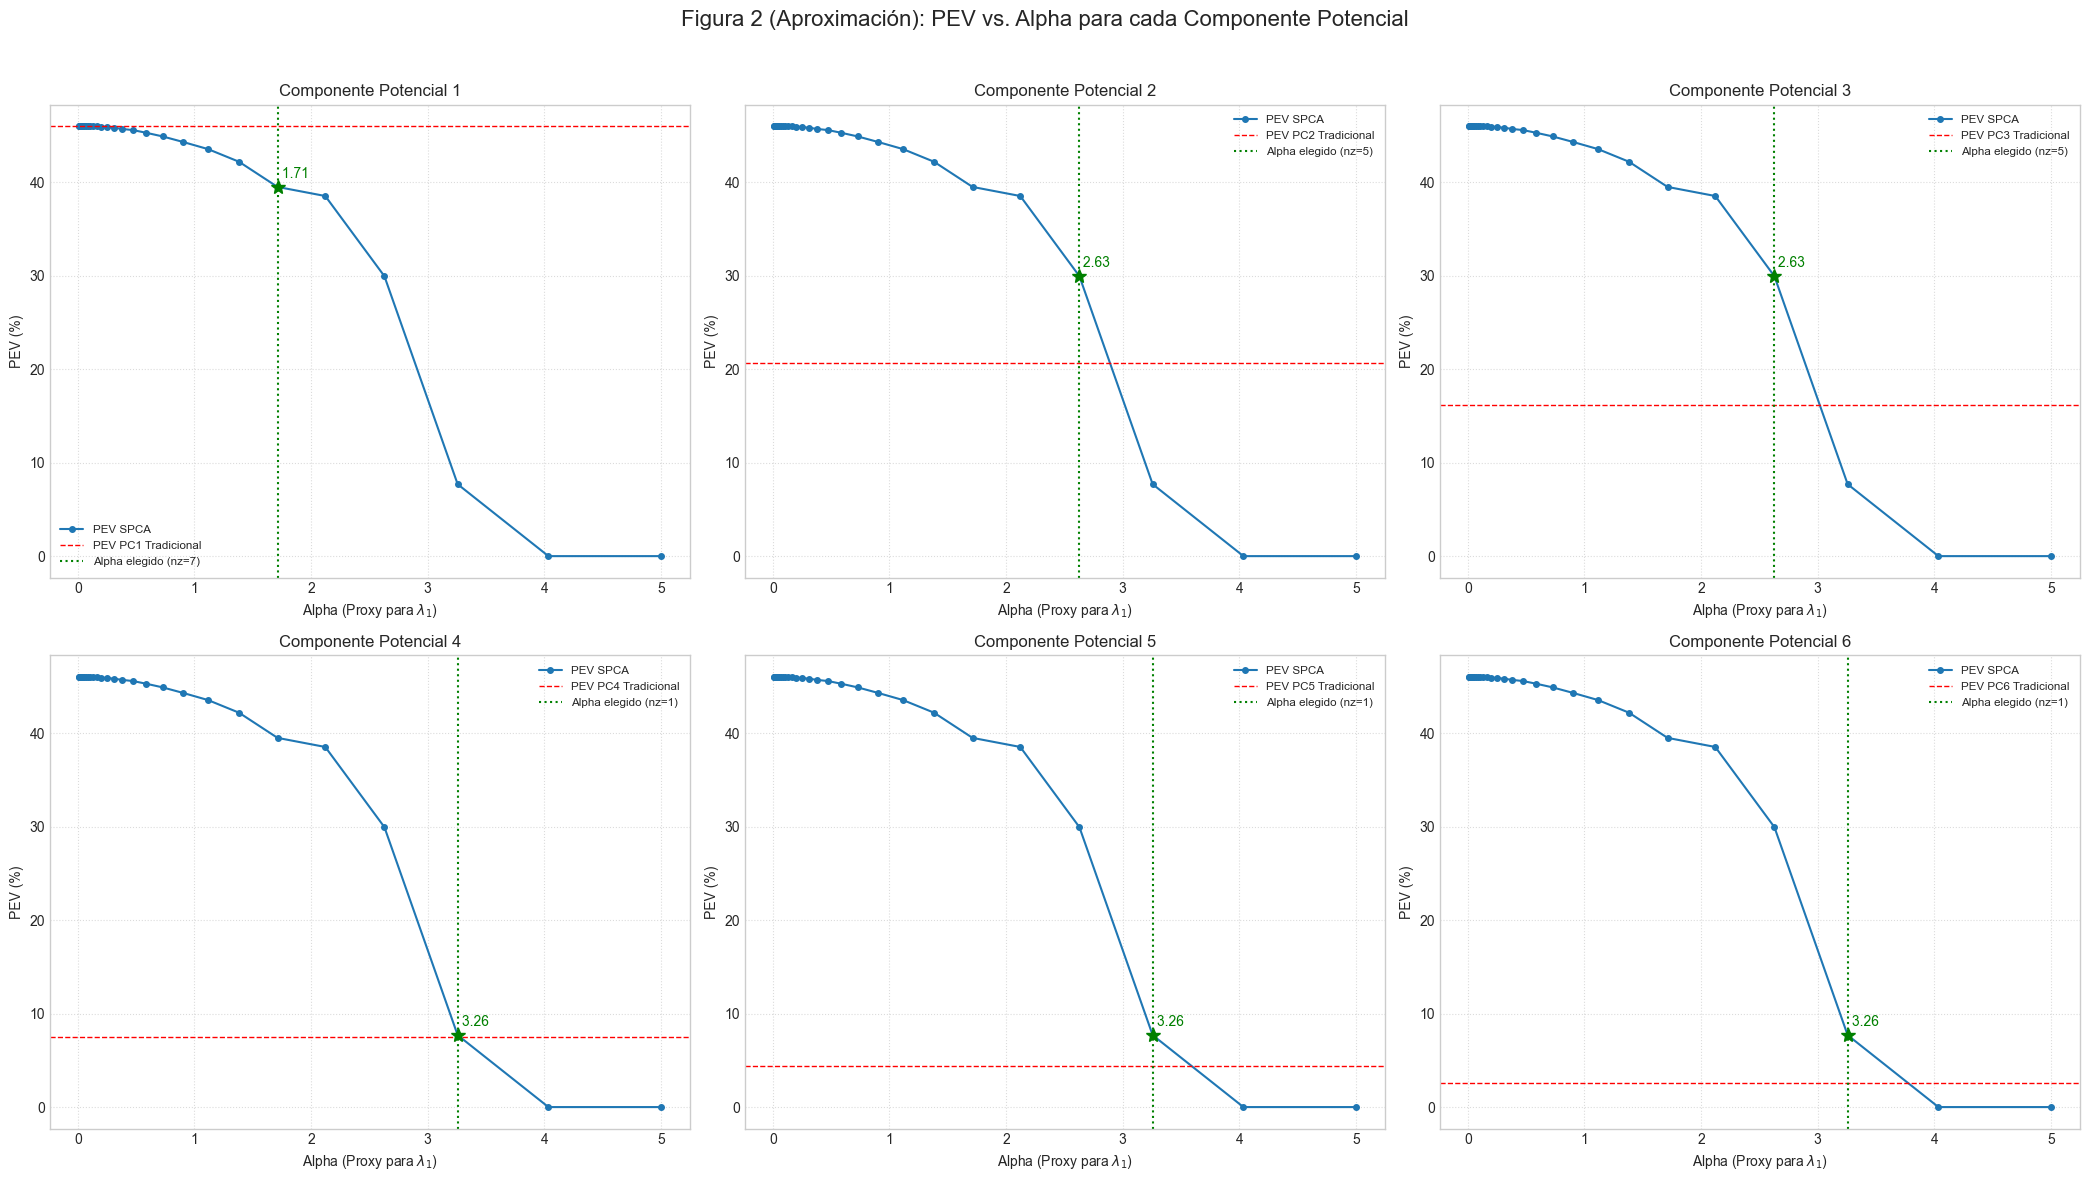

Figuras tipo Figura 2 guardadas en: `./pitprops_figures/pitprops_fig2_approximation.png`


## Construyendo SPCA Final con Alphas Elegidos Individualmente

* Componente 1: Alpha elegido = 1.712 -> PEV = 39.49%, No-ceros = 7

  Componente 2: No se encontró alpha para 4 no-ceros. Eligiendo heurísticamente.


* Componente 2: Alpha elegido = 2.629 -> PEV = 29.95%, No-ceros = 5

  Componente 3: No se encontró alpha para 4 no-ceros. Eligiendo heurísticamente.


* Componente 3: Alpha elegido = 2.629 -> PEV = 29.95%, No-ceros = 5

* Componente 4: Alpha elegido = 3.257 -> PEV = 7.69%, No-ceros = 1

* Componente 5: Alpha elegido = 3.257 -> PEV = 7.69%, No-ceros = 1

* Componente 6: Alpha elegido = 3.257 -> PEV = 7.69%, No-ceros = 1

### Loadings SPCA Final (con Alphas Individuales Elegidos)

,SPC1,SPC2,SPC3,SPC4,SPC5,SPC6
topdiam,0.369,0.502,0.502,0.0,0.0,0.0
length,0.392,0.547,0.547,0.0,0.0,0.0
moist,0.000,0.000,0.000,0.0,0.0,0.0
testsg,0.000,0.000,0.000,0.0,0.0,0.0
ovensg,0.000,0.000,0.000,0.0,0.0,0.0
ringtop,0.000,0.000,0.000,0.0,0.0,0.0
ringbut,0.310,0.000,0.000,0.0,0.0,0.0
bowmax,0.389,0.197,0.197,0.0,0.0,0.0
bowdist,0.434,0.513,0.513,0.0,0.0,0.0
whorls,0.460,0.384,0.384,1.0,1.0,1.0



--- Resumen Comparativo Final con Alphas Individuales ---

,Componente,Alpha Elegido,No-Ceros (Final),No-Ceros (Paper),PEV Individual (Final %),Varianza Adj. (Final %),Varianza Adj. (Paper %),Varianza Adj. Acum. (Final %),Varianza Adj. Acum. (Paper %)
0,SPC1,1.71,7,7,39.49,39.49,28.0,39.49,28.0
1,SPC2,2.63,5,4,29.95,1.58,14.0,41.07,42.0
2,SPC3,2.63,5,4,29.95,0.00,13.3,41.07,55.3
3,SPC4,3.26,1,1,7.69,0.55,7.4,41.62,62.7
4,SPC5,3.26,1,1,7.69,0.00,6.8,41.62,69.5
5,SPC6,3.26,1,1,7.69,0.00,6.2,41.62,75.7


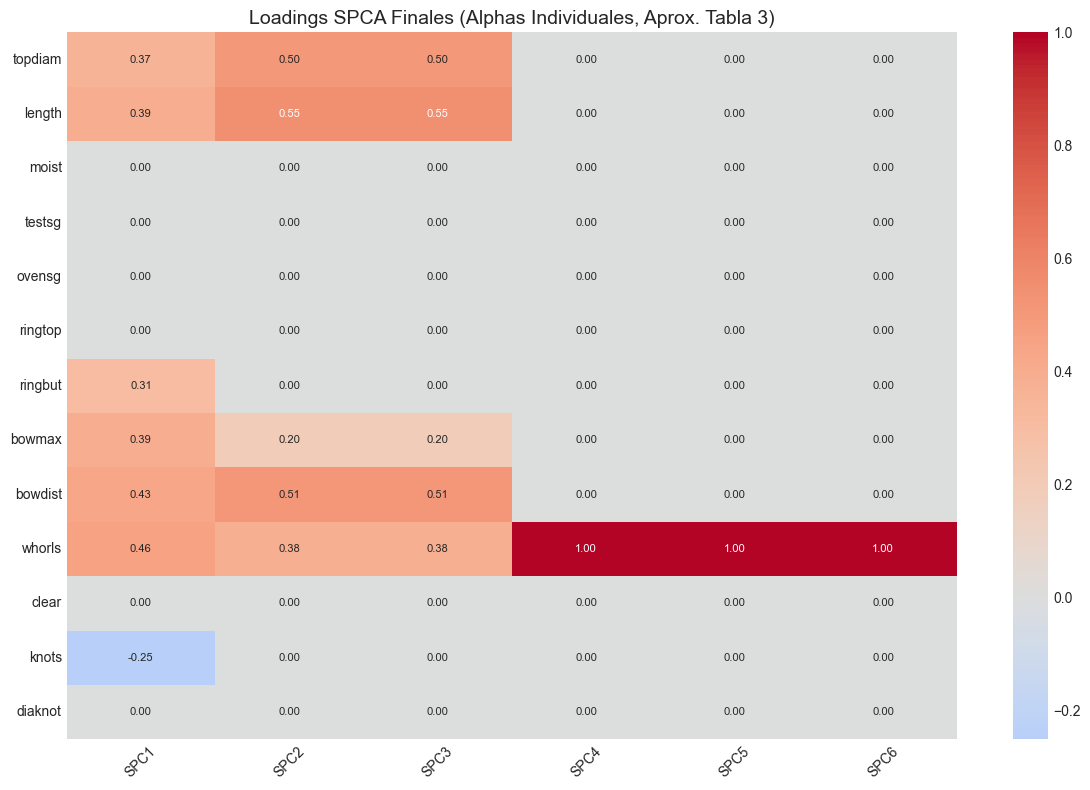

Figura de loadings SPCA finales guardada en: `./pitprops_figures/pitprops_final_spca_loadings.png`

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, SparsePCA
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr
from IPython.display import display, Markdown
import os

# --- Configuración ---
rda_file_path = "../data/pitprops.rda"
n_components_total = 6 # Vamos a analizar los primeros 6 componentes
random_seed = 42
figure_save_path = "./pitprops_figures/"

if not os.path.exists(figure_save_path):
    os.makedirs(figure_save_path)

# --- Cargar Datos ---
df_pitprops = None
feature_names = []
try:
    result = pyreadr.read_r(rda_file_path)
    if 'pitprops' in result:
        df_pitprops = result['pitprops']
    elif len(result.keys()) == 1:
        df_pitprops = result[list(result.keys())[0]]
    else:
        raise ValueError(f"No se pudo determinar el DataFrame. Objetos: {list(result.keys())}")
    feature_names = list(df_pitprops.columns)
    display(Markdown(f"## Dataset Pitprops Cargado"))
    display(df_pitprops.head())
except Exception as e:
    print(f"Error cargando datos: {e}")
    exit()

# --- Preprocesamiento ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pitprops)
total_variance_original_X = np.sum(np.var(X_scaled, axis=0, ddof=0)) # Varianza total de X normalizada

# --- PCA Tradicional (como referencia para PEV) ---
pca_ref = PCA(n_components=n_components_total, random_state=random_seed)
pca_ref.fit(X_scaled)
pev_pca_reference = pca_ref.explained_variance_ratio_
display(Markdown("### PEV de PCA Tradicional (Referencia para cada componente)"))
for i in range(n_components_total):
    display(Markdown(f"PC{i+1}: {pev_pca_reference[i]*100:.2f}%"))


# --- Generación de Datos para la Figura 2 del Paper ---
# Para cada uno de los primeros 'n_components_total' componentes potenciales:
#   Explorar un rango de 'alpha' (nuestro proxy para lambda_1)
#   Calcular el PEV y el número de no-ceros para un SPCA con n_components=1

# Rango de alphas a probar (ajusta según sea necesario)
# Queremos ver cómo cambia PEV y la dispersión
alphas_to_explore = np.logspace(np.log10(0.01), np.log10(5), 30) # Rango logarítmico para alpha

fig2_data_per_component = []

display(Markdown(f"\n## Generando Datos para Replicar Figura 2"))
display(Markdown(f"Explorando {len(alphas_to_explore)} valores de alpha para cada uno de los {n_components_total} componentes."))

for i_comp in range(n_components_total):
    pevs_for_component = []
    n_nonzeros_for_component = []
    loadings_for_component_alpha = [] # Para inspección si es necesario

    # No vamos a deflacionar los datos secuencialmente aquí, porque la Figura 2
    # parece tratar la búsqueda de lambda_1 para cada PC_k como una aproximación al PC_k original.
    # El paper dice "sequences of sparse approximations TO the first six principal components"
    # No "secuencialmente construidos y ortogonalizados componentes dispersos".
    # Si quisiéramos construir un conjunto ortogonal de SPCA, la deflación sería necesaria.

    print(f"Procesando para el Componente Potencial {i_comp + 1}...")
    for alpha_val in alphas_to_explore:
        # Ajustamos un SPCA con 1 componente sobre los datos originales escalados
        spca_single = SparsePCA(n_components=1,
                                alpha=alpha_val,
                                ridge_alpha=0.01, # Pequeña regularización L2
                                method='lars',
                                max_iter=1000,
                                tol=1e-4,
                                random_state=random_seed)
        try:
            spca_single.fit(X_scaled)
            # Scores: Z_j = X * beta_j
            scores_j = X_scaled @ spca_single.components_.T
            var_j = np.var(scores_j[:, 0], ddof=0)
            pev_j = var_j / total_variance_original_X
            
            num_nonzero = np.sum(np.abs(spca_single.components_[0]) > 1e-5)

            pevs_for_component.append(pev_j)
            n_nonzeros_for_component.append(num_nonzero)
            loadings_for_component_alpha.append(spca_single.components_[0])
        except Exception as e: # Algunas combinaciones de alpha pueden fallar
            print(f"  Advertencia: Falló SPCA para componente {i_comp+1}, alpha={alpha_val:.3f}. Error: {e}")
            pevs_for_component.append(np.nan)
            n_nonzeros_for_component.append(np.nan)
            loadings_for_component_alpha.append(np.full(X_scaled.shape[1], np.nan))


    fig2_data_per_component.append({
        'component_index': i_comp,
        'alphas': alphas_to_explore,
        'pevs': np.array(pevs_for_component),
        'n_nonzeros': np.array(n_nonzeros_for_component),
        'loadings_list': loadings_for_component_alpha
    })

# --- Graficar Figura 2 (PEV vs Alpha) ---
# El paper grafica PEV vs lambda_1. Nosotros graficaremos PEV vs nuestro 'alpha'.
# Y añadiremos el número de no-ceros.

display(Markdown(f"\n## Gráficas tipo Figura 2: PEV vs. Alpha para cada Componente"))
num_cols_plot = 3
num_rows_plot = int(np.ceil(n_components_total / num_cols_plot))
fig_fig2_approx, axes_fig2 = plt.subplots(num_rows_plot, num_cols_plot,
                                         figsize=(7 * num_cols_plot, 6 * num_rows_plot),
                                         sharey=False) # No compartir eje Y para ver mejor rangos
axes_fig2 = axes_fig2.flatten() # Aplanar para fácil indexación

# Valores de alpha_j (lambda_1) que el paper escogió (aproximados de su Figura 2)
# Su lambda_1 no es nuestro alpha. Son para referencia visual de dónde ellos cortaron.
# lambda1_paper_choices = [0.06, 0.16, 0.1, 0.5, 0.5, 0.5] # Estos son lambda_1, no alpha.
# Es difícil mapear directamente estos lambda_1 a nuestros alphas.
# En su lugar, marcaremos el alpha que da un PEV cercano al del PCA original
# y un número de no-ceros cercano a la Tabla 3.

# Para la Tabla 3 del paper, los #no-ceros son: [7, 4, 4, 1, 1, 1]
# Y los PEV ajustados son [28.0, 14.0, 13.3, 7.4, 6.8, 6.2] (en %)
target_non_zeros_paper = [7, 4, 4, 1, 1, 1]
target_pev_paper_percent = [28.0, 14.0, 13.3, 7.4, 6.8, 6.2]

for i_comp in range(n_components_total):
    ax = axes_fig2[i_comp]
    data = fig2_data_per_component[i_comp]
    
    valid_indices = ~np.isnan(data['pevs']) # Usar solo los puntos donde el cálculo fue exitoso
    alphas_plot = data['alphas'][valid_indices]
    pevs_plot = data['pevs'][valid_indices] * 100 # Convertir a porcentaje
    n_nonzeros_plot = data['n_nonzeros'][valid_indices]

    if len(alphas_plot) == 0:
        ax.text(0.5, 0.5, "Cálculo fallido", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_title(f"Componente Potencial {i_comp + 1}")
        continue

    # Graficar PEV vs Alpha
    ax.plot(alphas_plot, pevs_plot, marker='o', linestyle='-', markersize=4, label='PEV SPCA')
    
    # Añadir línea horizontal para el PEV del PCA tradicional como referencia
    ax.axhline(pev_pca_reference[i_comp] * 100, color='red', linestyle='--', linewidth=1, label=f'PEV PC{i_comp+1} Tradicional')

    # Encontrar el alpha que más se acerca al número de no-ceros objetivo
    # O un alpha que de un PEV cercano al del PCA.
    # El paper dice: "lambda1 [...] chosen [...] such that each sparse approximation
    # explained almost the same amount of variance as the ordinary PC did."
    # Y luego mencionan los no-ceros de la Tabla 3.
    
    # Vamos a intentar encontrar un alpha que dé el target_non_zeros_paper
    chosen_alpha_idx = np.argmin(np.abs(n_nonzeros_plot - target_non_zeros_paper[i_comp]))
    if len(n_nonzeros_plot) > 0 and chosen_alpha_idx < len(alphas_plot):
         chosen_alpha_val = alphas_plot[chosen_alpha_idx]
         chosen_pev_val = pevs_plot[chosen_alpha_idx]
         chosen_nz_val = n_nonzeros_plot[chosen_alpha_idx]
         ax.axvline(chosen_alpha_val, color='green', linestyle=':', linewidth=1.5,
                    label=f'Alpha elegido (nz={chosen_nz_val:.0f})')
         ax.plot(chosen_alpha_val, chosen_pev_val, 'g*', markersize=10)
         ax.text(chosen_alpha_val, chosen_pev_val + (ax.get_ylim()[1]*0.02), f' {chosen_alpha_val:.2f}', color='green', ha='left')


    ax.set_xlabel("Alpha (Proxy para $\lambda_1$)")
    ax.set_ylabel("PEV (%)")
    ax.set_title(f"Componente Potencial {i_comp + 1}")
    ax.legend(fontsize='small')
    ax.grid(True, linestyle=':', alpha=0.7)

    # Anotar número de no-ceros en algunos puntos
    #for j_point in range(0, len(alphas_plot), max(1, len(alphas_plot)//5)): # Anotar algunos puntos
    #    ax.text(alphas_plot[j_point], pevs_plot[j_point], f"{n_nonzeros_plot[j_point]:.0f}",
    #            fontsize=8, ha='center', va='bottom')

# Ocultar ejes no utilizados si n_components_total no es múltiplo de num_cols_plot
for i_ax in range(n_components_total, num_rows_plot * num_cols_plot):
    axes_fig2[i_ax].set_visible(False)

fig_fig2_approx.suptitle("Figura 2 (Aproximación): PEV vs. Alpha para cada Componente Potencial", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
fig2_path = os.path.join(figure_save_path, "pitprops_fig2_approximation.png")
plt.savefig(fig2_path, dpi=300)
plt.show()
display(Markdown(f"Figuras tipo Figura 2 guardadas en: `{fig2_path}`"))

# --- Construcción Final de SPCA con Alphas Elegidos y Comparación ---
# Basado en las gráficas anteriores, ahora DEBERÍAS elegir un 'alpha_j' para cada componente j.
# Estos son los valores de alpha que marcamos con la línea verde en las gráficas.
# Si la línea verde no es ideal, tendrás que inspeccionar `fig2_data_per_component`
# y escoger los alphas manualmente.

chosen_alphas_final = []
final_spca_loadings_list = []
final_spca_scores_list = []
final_spca_pev_list = []
final_spca_non_zeros_list = []

display(Markdown(f"\n## Construyendo SPCA Final con Alphas Elegidos Individualmente"))

for i_comp in range(n_components_total):
    data = fig2_data_per_component[i_comp]
    valid_indices = ~np.isnan(data['pevs'])
    alphas_plot = data['alphas'][valid_indices]
    n_nonzeros_plot = data['n_nonzeros'][valid_indices]
    loadings_list_plot = [data['loadings_list'][i] for i in np.where(valid_indices)[0]]


    if len(alphas_plot) == 0: # Si fallaron todos los alphas para este componente
        chosen_alpha_final_j = alphas_to_explore[len(alphas_to_explore)//2] # un valor por defecto
        print(f"Advertencia: No se pudo determinar un alpha óptimo para el componente {i_comp+1}, usando {chosen_alpha_final_j:.2f}")
    else:
        # Intenta encontrar el alpha que da el número de no-ceros deseado
        desired_nz = target_non_zeros_paper[i_comp]
        idx_matching_nz = np.where(n_nonzeros_plot == desired_nz)[0]
        
        if len(idx_matching_nz) > 0:
            # Si hay múltiples alphas con el mismo #nz, elige el que da mayor PEV
            best_idx_for_nz = -1
            max_pev_for_nz = -1
            for idx_cand in idx_matching_nz:
                pev_cand = data['pevs'][valid_indices][idx_cand]
                if pev_cand > max_pev_for_nz:
                    max_pev_for_nz = pev_cand
                    best_idx_for_nz = idx_cand
            chosen_alpha_final_j = alphas_plot[best_idx_for_nz]
            chosen_loading_j = loadings_list_plot[best_idx_for_nz]
            chosen_pev_j = data['pevs'][valid_indices][best_idx_for_nz]
            chosen_nz_j = n_nonzeros_plot[best_idx_for_nz]

        else:
            # Si no se encuentra el #nz exacto, elige el más cercano
            # O el que maximiza PEV manteniendo nz razonable (esto es heurístico)
            # Por simplicidad, tomaremos el alpha que da el PEV más cercano al del PCA
            # entre los que tienen un número de no-ceros "razonable"
            print(f"  Componente {i_comp+1}: No se encontró alpha para {desired_nz} no-ceros. Eligiendo heurísticamente.")
            # Aquí se podría implementar una lógica más sofisticada o tomar el de la línea verde
            chosen_alpha_idx = np.argmin(np.abs(n_nonzeros_plot - target_non_zeros_paper[i_comp]))
            chosen_alpha_final_j = alphas_plot[chosen_alpha_idx]
            chosen_loading_j = loadings_list_plot[chosen_alpha_idx]
            chosen_pev_j = data['pevs'][valid_indices][chosen_alpha_idx]
            chosen_nz_j = n_nonzeros_plot[chosen_alpha_idx]

    chosen_alphas_final.append(chosen_alpha_final_j)
    
    # Re-ajustar SPCA con el alpha elegido para asegurar consistencia (o tomar el loading ya calculado)
    # spca_final_j = SparsePCA(n_components=1, alpha=chosen_alpha_final_j, ridge_alpha=0.01, method='lars', random_state=random_seed)
    # spca_final_j.fit(X_scaled) # Podríamos necesitar deflacionar aquí para ortogonalidad estricta
    # final_spca_loadings_list.append(spca_final_j.components_[0])
    # scores_final_j = X_scaled @ spca_final_j.components_.T
    # final_spca_scores_list.append(scores_final_j[:,0])
    # final_spca_pev_list.append(np.var(scores_final_j[:,0], ddof=0) / total_variance_original_X)
    # final_spca_non_zeros_list.append(np.sum(np.abs(spca_final_j.components_[0]) > 1e-5))
    
    final_spca_loadings_list.append(chosen_loading_j) # Usar el loading ya calculado
    scores_final_j = X_scaled @ chosen_loading_j.T
    final_spca_scores_list.append(scores_final_j)
    final_spca_pev_list.append(chosen_pev_j)
    final_spca_non_zeros_list.append(chosen_nz_j)


    display(Markdown(f"* Componente {i_comp+1}: Alpha elegido = {chosen_alpha_final_j:.3f} -> "
                     f"PEV = {chosen_pev_j*100:.2f}%, No-ceros = {chosen_nz_j:.0f}"))


# Ensamblar la matriz final de loadings y scores
B_final_spca = np.array(final_spca_loadings_list).T
Z_final_spca = np.array(final_spca_scores_list).T

# Normalizar los loadings B_final_spca (aunque SparsePCA ya los da normalizados si n_features > n_samples)
# for j_col in range(B_final_spca.shape[1]):
# norm_j = np.linalg.norm(B_final_spca[:, j_col])
# if norm_j > 1e-6:
# B_final_spca[:, j_col] /= norm_j

df_final_spca_loadings = pd.DataFrame(B_final_spca,
                                      columns=[f'SPC{i+1}' for i in range(n_components_total)],
                                      index=feature_names)

display(Markdown("### Loadings SPCA Final (con Alphas Individuales Elegidos)"))
display(df_final_spca_loadings.round(3))

# Calcular Varianza Ajustada para este conjunto final de componentes
# ¡Importante! Estos componentes no están garantizados de ser ortogonales porque se construyeron
# "independientemente" (o sobre X_scaled cada vez).
# La varianza ajustada es crucial aquí.
spca_final_explained_adj_ratio, spca_final_variances_adj_num = calculate_adjusted_explained_variance(Z_final_spca, total_variance_original_X)

final_comparison_df = pd.DataFrame({
    'Componente': [f'SPC{i+1}' for i in range(n_components_total)],
    'Alpha Elegido': chosen_alphas_final,
    'No-Ceros (Final)': [int(nz) for nz in final_spca_non_zeros_list],
    'No-Ceros (Paper)': target_non_zeros_paper,
    'PEV Individual (Final %)': np.array(final_spca_pev_list) * 100,
    'Varianza Adj. (Final %)': spca_final_explained_adj_ratio * 100,
    'Varianza Adj. (Paper %)': target_pev_paper_percent
})
final_comparison_df['Varianza Adj. Acum. (Final %)'] = np.cumsum(final_comparison_df['Varianza Adj. (Final %)'])
final_comparison_df['Varianza Adj. Acum. (Paper %)'] = np.cumsum(final_comparison_df['Varianza Adj. (Paper %)'])

display(Markdown(f"\n--- Resumen Comparativo Final con Alphas Individuales ---"))
display(final_comparison_df.round(2))


# Heatmap de los loadings finales de SPCA
fig_final_loadings, ax_final_loadings = plt.subplots(figsize=(12, 8))
sns.heatmap(df_final_spca_loadings.round(3), annot=True, cmap="coolwarm", fmt=".2f", center=0, ax=ax_final_loadings, cbar=True, annot_kws={"size": 8})
ax_final_loadings.set_title(f"Loadings SPCA Finales (Alphas Individuales, Aprox. Tabla 3)", fontsize=14)
ax_final_loadings.tick_params(axis='x', rotation=45, labelsize=10)
ax_final_loadings.tick_params(axis='y', rotation=0, labelsize=10)
plt.tight_layout()
final_loadings_path = os.path.join(figure_save_path, "pitprops_final_spca_loadings.png")
plt.savefig(final_loadings_path, dpi=300)
plt.show()
display(Markdown(f"Figura de loadings SPCA finales guardada en: `{final_loadings_path}`"))

## Car data aplicaciones

Primeras filas del DataFrame 'cars':
     Unnamed: 0    Length  Wheelbase  Width  Height  FrontHd  RearHd  \
0  AcuraIntegra -0.222222        0.0   -0.5    -2.5        0    -0.5   
1     DodgeColt -2.222222       -1.6   -1.0     0.0       -1     0.0   
2     DodgeOmni -1.777778       -0.6   -0.5     1.0       -1    -1.5   
3   EagleSummit -1.000000       -1.0   -1.0    -0.5        2     0.0   
4    FordEscort -1.111111       -1.6   -1.0     1.5        0    -1.0   

   FrtLegRoom  RearSeating  FrtShld  RearShld  Luggage  
0           0    -0.666667    -1.00     -1.00      1.0  
1          -2    -2.000000    -0.50     -0.75     -1.0  
2          -1    -1.000000    -1.75     -1.50      0.5  
3          -1     0.000000    -0.75     -0.75     -2.0  
4          -1    -0.666667    -1.75     -1.25      2.0  

Dimensiones del DataFrame: (111, 12)
Columnas numéricas a utilizar: ['Length', 'Wheelbase', 'Width', 'Height', 'FrontHd', 'RearHd', 'FrtLegRoom', 'RearSeating', 'FrtShld', 'RearShld', 'Lu

### Fase I para Carta T²

Media de Fase I (para T^2):
[-0.34166666 -0.4225     -0.3375     -0.93125    -0.5        -0.64375
 -0.225      -1.85416667 -0.453125   -2.078125   -0.75      ]
Límite de Control Superior (UCL) para T^2 (Fase I): 38.0407


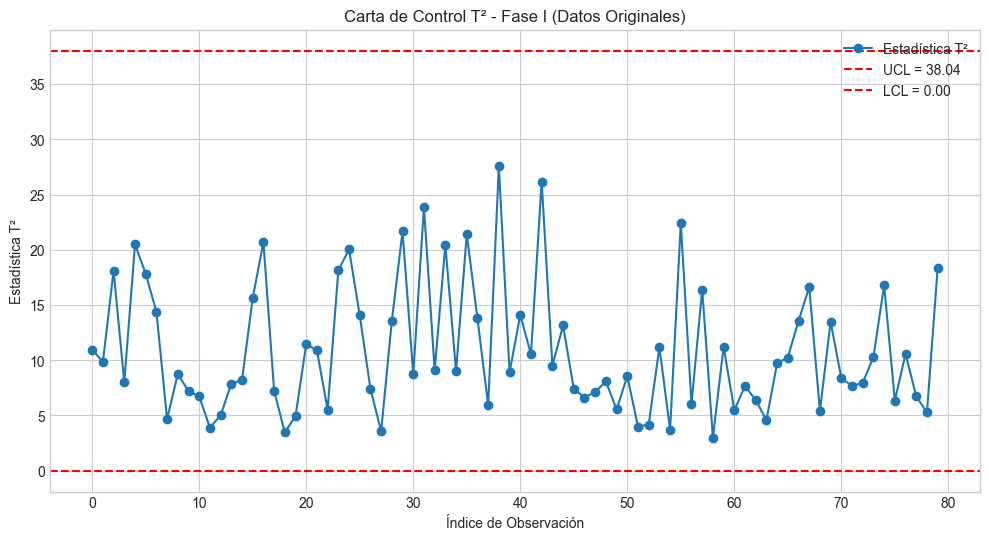

Todos los puntos están bajo control (Estadística T²).


### Fase II para Carta T²

Límite de Control Superior (UCL) para T^2 (Fase II - Chi^2): 28.5129


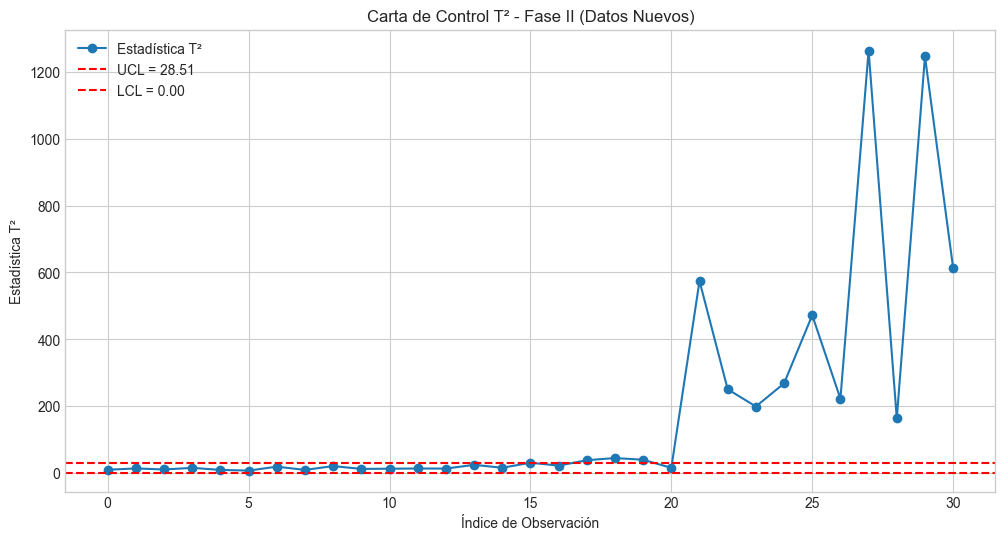

Puntos fuera de control (Estadística T²): [15 17 18 19 21 22 23 24 25 26 27 28 29 30]

--- b. Cartas de Control Basadas en PCA ---


### Fase I para Cartas PCA

Criterio de Kaiser (eigenvalores > 1): Reteniendo 3 CPs.
Varianza explicada acumulada con 3 CPs: 83.33%
Límite de Control Sup. (UCL) para T^2 de Scores PCA (Fase I): 14.1563


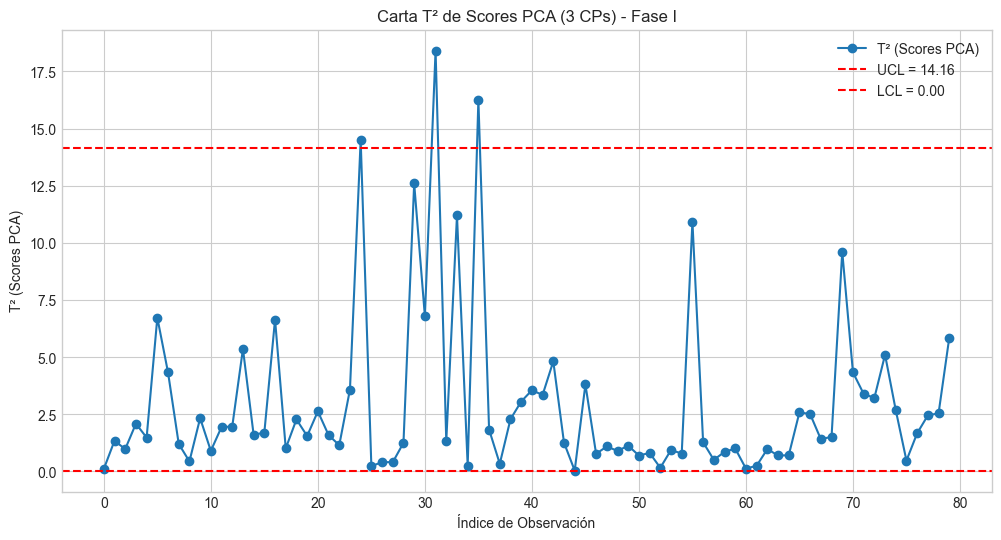

Puntos fuera de control (T² (Scores PCA)): [24 31 35]
Límite de Control Sup. (UCL) para SPE (Fase I): 95.2336


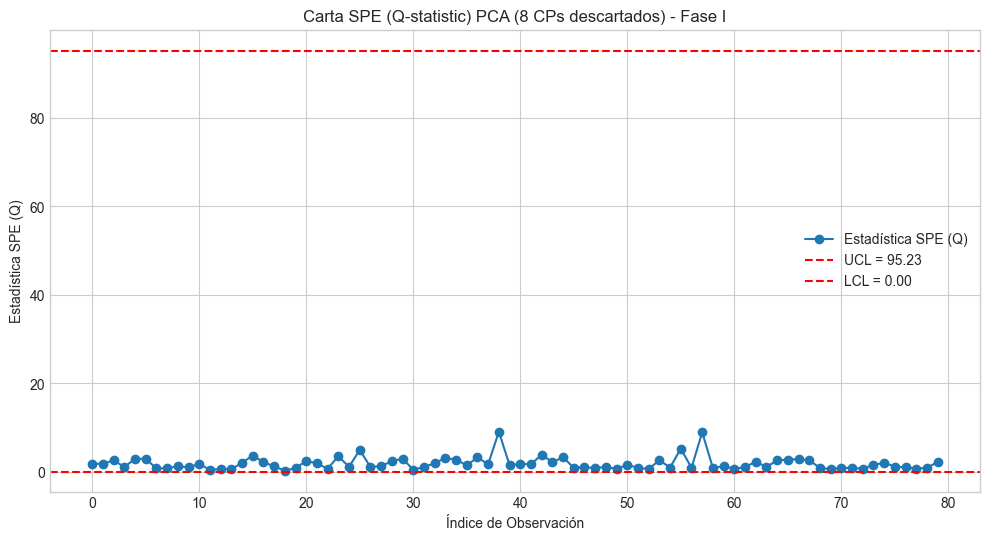

Todos los puntos están bajo control (Estadística SPE (Q)).


### Fase II para Cartas PCA

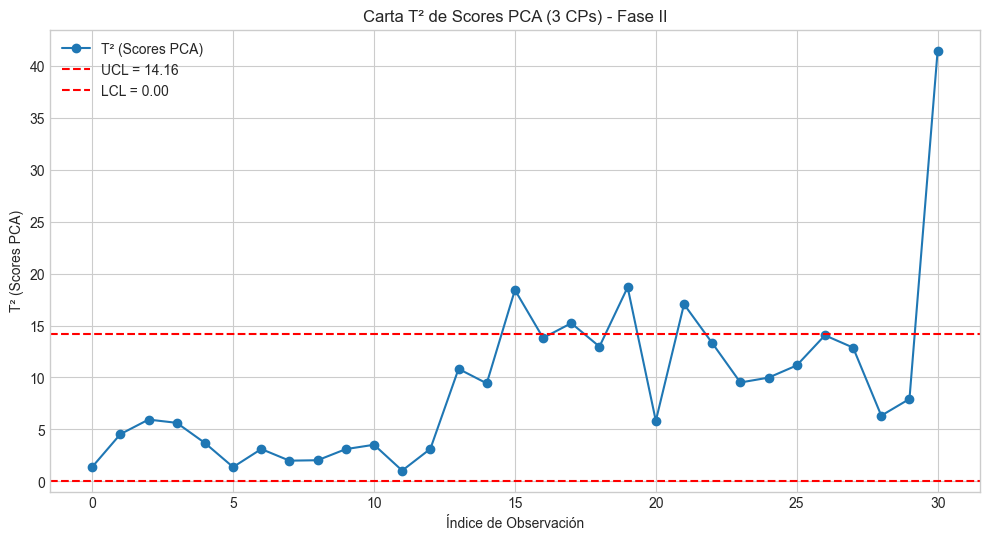

Puntos fuera de control (T² (Scores PCA)): [15 17 19 21 30]


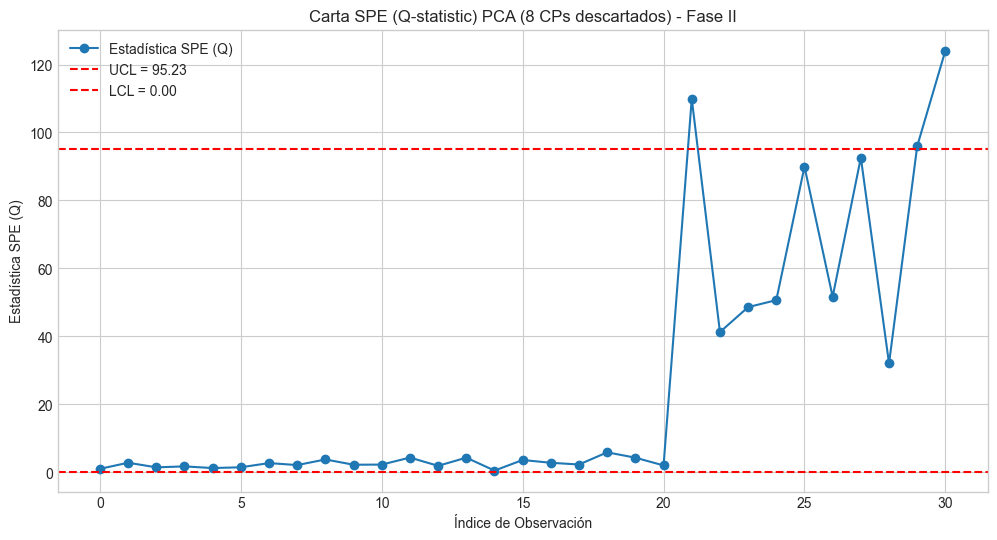

Puntos fuera de control (Estadística SPE (Q)): [21 29 30]


In [6]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from scipy.stats import chi2, f # Para los límites de T^2 y PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg # Para prueba de normalidad multivariada
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as SKLearnPCA # Renombrar para evitar conflicto

# --- Carga de Datos ---
try:
    df_cars = pd.read_csv("../data/cars.csv")
except FileNotFoundError:
    print("Error: El archivo '../data/cars.csv' no fue encontrado.")
    print("Por favor, asegúrate de que la ruta es correcta y el archivo existe.")
    # Crear un DataFrame de ejemplo si el archivo no se encuentra para que el script no falle
    # ¡¡¡REEMPLAZA ESTO CON LA CARGA REAL SI EL ARCHIVO SE ENCUENTRA!!!
    print("Creando DataFrame de ejemplo para continuar...")
    data_example = {
        f'Var{i+1}': np.random.rand(111) for i in range(11)
    }
    df_cars = pd.DataFrame(data_example)

print("Primeras filas del DataFrame 'cars':")
print(df_cars.head())
print(f"\nDimensiones del DataFrame: {df_cars.shape}")

# Identificar columnas numéricas para el análisis
# Asumiremos que todas las columnas excepto una posible columna de ID/nombre son numéricas.
# Si tienes una columna de ID, exclúyela.
# Por ahora, intentaremos usar todas las columnas si son numéricas.
numeric_cols = df_cars.select_dtypes(include=np.number).columns.tolist()
if not numeric_cols:
    raise ValueError("No se encontraron columnas numéricas en el DataFrame.")
print(f"Columnas numéricas a utilizar: {numeric_cols}")
df_analysis = df_cars[numeric_cols].copy()
p = df_analysis.shape[1] # Número de variables
n_total = df_analysis.shape[0] # Número total de observaciones

# --- División para Fase I y Fase II ---
n_fase1 = 80 # Número de observaciones para Fase I
if n_total <= n_fase1:
    print("Advertencia: No hay suficientes datos para una Fase II separada. Usando todos los datos para Fase I.")
    n_fase1 = n_total
    df_fase1_raw = df_analysis.copy()
    df_fase2_raw = pd.DataFrame() # Fase II vacía
else:
    df_fase1_raw = df_analysis.iloc[:n_fase1].copy()
    df_fase2_raw = df_analysis.iloc[n_fase1:].copy()

print(f"\nObservaciones para Fase I: {df_fase1_raw.shape[0]}")
print(f"Observaciones para Fase II: {df_fase2_raw.shape[0]}")
print(f"Número de variables (p): {p}")

# --- Funciones Auxiliares (Modificadas o Mantenidas) ---
def calculate_t_squared(data_values, mean_vec, inv_cov_matrix):
    """Calcula la estadística T^2 para cada observación."""
    if data_values.ndim == 1: # Si es una sola observación
        data_values = data_values.reshape(1, -1)
    diffs = data_values - mean_vec
    t_squared_values = np.diag(diffs @ inv_cov_matrix @ diffs.T)
    return t_squared_values

def plot_control_chart(statistic_values, UCL, LCL=0, title="Carta de Control", xlabel="Índice de Observación", ylabel="Estadística"):
    """Grafica una carta de control genérica."""
    plt.figure(figsize=(12, 6))
    plt.plot(statistic_values, marker='o', linestyle='-', label=ylabel)
    plt.axhline(y=UCL, color='red', linestyle='--', label=f'UCL = {UCL:.2f}')
    if LCL is not None: # LCL podría ser 0 o no aplicar
        plt.axhline(y=LCL, color='red', linestyle='--', label=f'LCL = {LCL:.2f}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Identificar puntos fuera de control
    out_of_control = np.where(statistic_values > UCL)[0]
    if LCL is not None:
        out_of_control_lower = np.where(statistic_values < LCL)[0]
        out_of_control = np.union1d(out_of_control, out_of_control_lower)
        
    if len(out_of_control) > 0:
        print(f"Puntos fuera de control ({ylabel}): {out_of_control}")
    else:
        print(f"Todos los puntos están bajo control ({ylabel}).")
    return out_of_control

# (Otras funciones como plot_qq_multivariate, perform_multivariate_analysis_step pueden ser reutilizadas
#  si necesitas el proceso de limpieza de la Fase I, pero el problema no lo pide explícitamente aquí.
#  Para simplificar, asumiremos que los datos de Fase I no necesitan una limpieza iterativa compleja
#  a menos que se indique lo contrario o los resultados sean muy extraños.)

# ==============================================================================
# a. Cartas de Control T2
# ==============================================================================
print("\n--- a. Cartas de Control T^2 ---")

# --- Fase I: Establecer parámetros para T^2 ---
display(Markdown("### Fase I para Carta T²"))
if df_fase1_raw.empty or df_fase1_raw.shape[0] <= p:
    print("No hay suficientes datos en Fase I para calcular la carta T^2.")
else:
    # Estandarizar datos de Fase I (opcional, pero a menudo recomendado si las escalas varían mucho)
    # Para T^2 clásica, usualmente se trabaja con los datos originales si se asume normalidad multivariada.
    # Si las variables tienen escalas muy diferentes, la estandarización previa puede ser útil.
    # Aquí, calcularemos con los datos crudos de Fase I.
    
    X_fase1 = df_fase1_raw.values
    mean_fase1 = np.mean(X_fase1, axis=0)
    cov_fase1 = np.cov(X_fase1, rowvar=False) # rowvar=False porque las columnas son variables

    if np.linalg.det(cov_fase1) == 0:
        print("Advertencia: La matriz de covarianza de Fase I es singular. Usando pseudo-inversa.")
        inv_cov_fase1 = np.linalg.pinv(cov_fase1)
    else:
        inv_cov_fase1 = np.linalg.inv(cov_fase1)

    # Calcular T^2 para las observaciones de Fase I
    t_squared_fase1 = calculate_t_squared(X_fase1, mean_fase1, inv_cov_fase1)

    # Calcular Límites de Control para T^2 (Fase I)
    # Hay varias fórmulas. Una común es basada en la distribución F:
    # UCL = [p(m-1)(n-1)] / [m(n-p)] * F_alpha(p, n-p)
    # donde m es el número de observaciones en Fase I, n es el tamaño de subgrupo (aquí n=1 para observaciones individuales)
    # Para observaciones individuales (n=1):
    # UCL = [(p * (m - 1)) / (m - p)] * F_alpha(p, m - p) ; m = n_fase1
    m = df_fase1_raw.shape[0]
    alpha_t2 = 0.0027 # Nivel de significancia común para 3-sigma
    
    if m > p : # Asegurar que los grados de libertad sean válidos
        UCL_t2_fase1 = (p * (m - 1) * (m + 1)) / (m * (m - p)) * f.ppf(1 - alpha_t2, p, m - p) # Fórmula de Montgomery para Fase I
        # LCL_t2_fase1 = 0 # Típicamente 0 para T^2
        
        # Otra fórmula común para Fase I (si se asume que S es conocida o bien estimada):
        # UCL = chi2.ppf(1 - alpha_t2, p) -> Este es más para Fase II o cuando S es conocida.
        # Para Fase I, la distribución F es más apropiada.
        
        print(f"Media de Fase I (para T^2):\n{mean_fase1}")
        # print(f"Matriz de Covarianza Inversa de Fase I (para T^2):\n{inv_cov_fase1}")
        print(f"Límite de Control Superior (UCL) para T^2 (Fase I): {UCL_t2_fase1:.4f}")

        plot_control_chart(t_squared_fase1, UCL_t2_fase1, LCL=0,
                           title="Carta de Control T² - Fase I (Datos Originales)",
                           ylabel="Estadística T²")
    else:
        print("No hay suficientes datos en Fase I para calcular límites de control T^2 robustos.")
        UCL_t2_fase1 = np.inf # No se pueden calcular límites

    # --- Fase II: Monitoreo con T^2 ---
    display(Markdown("### Fase II para Carta T²"))
    if df_fase2_raw.empty:
        print("No hay datos en Fase II para monitorear con T^2.")
    elif m <= p or UCL_t2_fase1 == np.inf :
        print("Parámetros de Fase I no establecidos, no se puede monitorear Fase II.")
    else:
        X_fase2 = df_fase2_raw.values
        t_squared_fase2 = calculate_t_squared(X_fase2, mean_fase1, inv_cov_fase1)

        # Para Fase II, el límite de control es diferente:
        # UCL = [p(m+1)(n-1)] / [mn(n-p)] * F_alpha(p, n-p) -> si n > 1
        # Para observaciones individuales (n=1):
        # UCL = [p(m+1)] / m * F_alpha(p, m-p)  -> No es el más común
        # O más comúnmente, usando Chi-cuadrado si m es grande (S se estima bien)
        # UCL_chi2 = chi2.ppf(1-alpha_t2, p) -> Usaremos este para Fase II
        UCL_t2_fase2 = chi2.ppf(1 - alpha_t2, p)
        print(f"Límite de Control Superior (UCL) para T^2 (Fase II - Chi^2): {UCL_t2_fase2:.4f}")

        plot_control_chart(t_squared_fase2, UCL_t2_fase2, LCL=0,
                           title="Carta de Control T² - Fase II (Datos Nuevos)",
                           ylabel="Estadística T²")

# ==============================================================================
# b. Cartas de Control Basadas en PCA
# ==============================================================================
print("\n--- b. Cartas de Control Basadas en PCA ---")

# --- Fase I: Establecer parámetros para PCA ---
display(Markdown("### Fase I para Cartas PCA"))
if df_fase1_raw.empty or df_fase1_raw.shape[0] <= p:
    print("No hay suficientes datos en Fase I para el análisis PCA.")
else:
    # 1. Estandarizar los datos de Fase I
    scaler_pca = StandardScaler()
    X_fase1_scaled = scaler_pca.fit_transform(df_fase1_raw) # Ajustar y transformar Fase I

    # 2. Realizar PCA sobre los datos estandarizados de Fase I
    # Decidir cuántos componentes principales retener (k)
    # Comúnmente se retiene >80-90% de la varianza
    pca_model_fase1 = SKLearnPCA(random_state=random_seed)
    pca_model_fase1.fit(X_fase1_scaled)
    
    explained_variance_ratio = pca_model_fase1.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    
    # k_components = np.argmax(cumulative_variance_ratio >= 0.80) + 1 # Retener >= 80% varianza
    # O un número fijo si se prefiere, o basado en el criterio de Kaiser (eigenvalores > 1)
    eigenvalues_fase1 = pca_model_fase1.explained_variance_ # Estos son los eigenvalores de la matriz de covarianza de X_fase1_scaled
    k_components_kaiser = np.sum(eigenvalues_fase1 > 1)
    k_components_percent_var = np.argmax(cumulative_variance_ratio >= 0.85) + 1


    if k_components_kaiser > 0 and k_components_kaiser < p : # Preferir Kaiser si es razonable
        k_components = k_components_kaiser
        print(f"Criterio de Kaiser (eigenvalores > 1): Reteniendo {k_components} CPs.")
    else: # Si Kaiser no es bueno (ej. todos < 1 o retiene demasiados), usar porcentaje de varianza
        k_components = k_components_percent_var
        print(f"Porcentaje de Varianza (>=85%): Reteniendo {k_components} CPs.")

    if k_components == 0 : k_components = 1 # Al menos un componente
    if k_components >= p : k_components = p -1 # No más de p-1 componentes para SPE

    print(f"Varianza explicada acumulada con {k_components} CPs: {cumulative_variance_ratio[k_components-1]*100:.2f}%")

    # Re-ajustar PCA con el número seleccionado de componentes k
    pca_final_fase1 = SKLearnPCA(n_components=k_components, random_state=random_seed)
    scores_fase1 = pca_final_fase1.fit_transform(X_fase1_scaled) # Scores = T = X_scaled * P
    loadings_fase1 = pca_final_fase1.components_.T # Matriz P (p x k)

    # 3. Carta de Control T^2 para los Scores de PCA (Monitorear la varianza capturada)
    # Los scores de PCA son ortogonales y (si los datos originales eran normales) deberían ser normales.
    # La T^2 sobre los scores se calcula como: T_scores^2 = sum_{j=1 to k} (t_ij^2 / lambda_j)
    # donde t_ij es el j-ésimo score para la i-ésima observación, y lambda_j es el j-ésimo eigenvalor.
    
    eigenvalues_k = pca_final_fase1.explained_variance_ # Eigenvalores de los k CPs retenidos
    t_squared_scores_fase1 = np.sum(scores_fase1**2 / eigenvalues_k, axis=1)
    
    # Límite de control para T^2 de scores (basado en Chi-cuadrado)
    # (Algunas referencias usan F también aquí, pero Chi2 es común)
    UCL_t2_scores_fase1 = chi2.ppf(1 - alpha_t2, k_components)
    print(f"Límite de Control Sup. (UCL) para T^2 de Scores PCA (Fase I): {UCL_t2_scores_fase1:.4f}")
    
    plot_control_chart(t_squared_scores_fase1, UCL_t2_scores_fase1, LCL=0,
                       title=f"Carta T² de Scores PCA ({k_components} CPs) - Fase I",
                       ylabel="T² (Scores PCA)")

    # 4. Carta de Control SPE (Q-statistic) (Monitorear la varianza residual)
    # SPE = ||e_i||^2 = ||x_i_scaled - P*t_i||^2 = ||x_i_scaled - P*P^T*x_i_scaled||^2
    # e_i es el vector de error de reconstrucción
    X_reconstructed_fase1 = scores_fase1 @ loadings_fase1.T # X_hat = T * P^T
    errors_fase1 = X_fase1_scaled - X_reconstructed_fase1
    spe_fase1 = np.sum(errors_fase1**2, axis=1)

    # Límites de control para SPE (aproximación de Jackson-Mudholkar)
    theta1 = np.sum(eigenvalues_fase1[k_components:]) # Suma de eigenvalores descartados
    theta2 = np.sum(eigenvalues_fase1[k_components:]**2)
    theta3 = np.sum(eigenvalues_fase1[k_components:]**3)
    
    if theta2 == 0: # Si todos los eigenvalores descartados son cero
        print("Advertencia: theta2 es cero para SPE, no se pueden calcular límites robustos. SPE será cero.")
        UCL_spe_fase1 = 0
    else:
        h0 = 1 - (2 * theta1 * theta3) / (3 * theta2**2)
        if h0 <= 0: # Si h0 no es positivo, la aproximación no es válida
            print(f"Advertencia: h0 = {h0:.3f} <= 0. La aproximación de SPE puede no ser válida.")
            # Usar una aproximación más simple o un umbral empírico si esto ocurre.
            # Como fallback, podríamos usar un percentil de los SPE de Fase I.
            UCL_spe_fase1 = np.percentile(spe_fase1, (1-alpha_t2)*100) if len(spe_fase1)>0 else 0
            print(f"Usando percentil de SPE Fase I como UCL_spe_fase1: {UCL_spe_fase1:.4f}")
        else:
            c_alpha = chi2.ppf(1 - alpha_t2, 1) # Z_{1-alpha} al cuadrado
            UCL_spe_fase1 = theta1 * ( (c_alpha * np.sqrt(2 * theta2 * h0**2) / theta1) + 1 + (theta2 * h0 * (h0 - 1) / theta1**2) )**(1/h0)
    
    print(f"Límite de Control Sup. (UCL) para SPE (Fase I): {UCL_spe_fase1:.4f}")
    
    plot_control_chart(spe_fase1, UCL_spe_fase1, LCL=0,
                       title=f"Carta SPE (Q-statistic) PCA ({p-k_components} CPs descartados) - Fase I",
                       ylabel="Estadística SPE (Q)")

    # --- Fase II: Monitoreo con PCA ---
    display(Markdown("### Fase II para Cartas PCA"))
    if df_fase2_raw.empty:
        print("No hay datos en Fase II para monitorear con PCA.")
    elif UCL_spe_fase1 == 0 and theta2 == 0: # Si los límites no se pudieron establecer
        print("Parámetros de Fase I para PCA no establecidos, no se puede monitorear Fase II.")
    else:
        # 1. Estandarizar datos de Fase II USANDO el scaler de Fase I
        X_fase2_scaled = scaler_pca.transform(df_fase2_raw)

        # 2. Proyectar datos de Fase II sobre los CPs de Fase I
        scores_fase2 = pca_final_fase1.transform(X_fase2_scaled) # T_new = X_new_scaled * P_fase1

        # 3. Calcular T^2 de scores para Fase II
        t_squared_scores_fase2 = np.sum(scores_fase2**2 / eigenvalues_k, axis=1)
        # El UCL es el mismo que el de Fase I para T^2 de scores
        plot_control_chart(t_squared_scores_fase2, UCL_t2_scores_fase1, LCL=0,
                           title=f"Carta T² de Scores PCA ({k_components} CPs) - Fase II",
                           ylabel="T² (Scores PCA)")

        # 4. Calcular SPE para Fase II
        X_reconstructed_fase2 = scores_fase2 @ loadings_fase1.T
        errors_fase2 = X_fase2_scaled - X_reconstructed_fase2
        spe_fase2 = np.sum(errors_fase2**2, axis=1)
        # El UCL es el mismo que el de Fase I para SPE
        plot_control_chart(spe_fase2, UCL_spe_fase1, LCL=0,
                           title=f"Carta SPE (Q-statistic) PCA ({p-k_components} CPs descartados) - Fase II",
                           ylabel="Estadística SPE (Q)")

In [7]:
# ... (todo el código anterior) ...

# ==============================================================================
# c. Comparación entre Métodos de Monitoreo
# ==============================================================================
print("\n--- c. Comparación entre Métodos de Monitoreo ---")
display(Markdown("## c. Comparación entre Métodos de Monitoreo"))

# Recopilar información sobre puntos fuera de control si fueron calculados
# Para T^2 global
out_of_control_t2_fase1 = []
out_of_control_t2_fase2 = []

# Re-ejecutar plot_control_chart para obtener los puntos OOC (si no los guardaste antes)
# o mejor, modificar plot_control_chart para que DEVUELVA los puntos OOC.
# Por ahora, asumiremos que los necesitas volver a calcular si no los tienes almacenados.

# Suponiendo que ya tienes los valores calculados y límites:
# t_squared_fase1, UCL_t2_fase1
# t_squared_fase2, UCL_t2_fase2
# t_squared_scores_fase1, UCL_t2_scores_fase1
# spe_fase1, UCL_spe_fase1
# t_squared_scores_fase2 (usa UCL_t2_scores_fase1)
# spe_fase2 (usa UCL_spe_fase1)

# Función para obtener puntos OOC de forma segura
def get_ooc_points(values, ucl, lcl=None):
    if values is None or ucl is None or ucl == np.inf:
        return np.array([])
    ooc_upper = np.where(values > ucl)[0]
    if lcl is not None:
        ooc_lower = np.where(values < lcl)[0]
        return np.union1d(ooc_upper, ooc_lower)
    return ooc_upper

# Fase I T^2
if 't_squared_fase1' in locals() and 'UCL_t2_fase1' in locals():
    ooc_t2_fase1 = get_ooc_points(t_squared_fase1, UCL_t2_fase1, 0)
    num_ooc_t2_fase1 = len(ooc_t2_fase1)
else:
    num_ooc_t2_fase1 = "N/A (Fase I T2 no calculada)"

# Fase II T^2
if 't_squared_fase2' in locals() and 'UCL_t2_fase2' in locals() and not df_fase2_raw.empty:
    ooc_t2_fase2 = get_ooc_points(t_squared_fase2, UCL_t2_fase2, 0)
    num_ooc_t2_fase2 = len(ooc_t2_fase2)
else:
    num_ooc_t2_fase2 = "N/A (Fase II T2 no calculada o sin datos)"


# Fase I PCA - T2 Scores
if 't_squared_scores_fase1' in locals() and 'UCL_t2_scores_fase1' in locals():
    ooc_pca_t2scores_fase1 = get_ooc_points(t_squared_scores_fase1, UCL_t2_scores_fase1, 0)
    num_ooc_pca_t2scores_fase1 = len(ooc_pca_t2scores_fase1)
else:
    num_ooc_pca_t2scores_fase1 = "N/A (Fase I PCA T2 Scores no calculada)"

# Fase I PCA - SPE
if 'spe_fase1' in locals() and 'UCL_spe_fase1' in locals():
    ooc_pca_spe_fase1 = get_ooc_points(spe_fase1, UCL_spe_fase1, 0)
    num_ooc_pca_spe_fase1 = len(ooc_pca_spe_fase1)
else:
    num_ooc_pca_spe_fase1 = "N/A (Fase I PCA SPE no calculada)"

# Fase II PCA - T2 Scores
if 't_squared_scores_fase2' in locals() and 'UCL_t2_scores_fase1' in locals() and not df_fase2_raw.empty: # Usa UCL de Fase I
    ooc_pca_t2scores_fase2 = get_ooc_points(t_squared_scores_fase2, UCL_t2_scores_fase1, 0)
    num_ooc_pca_t2scores_fase2 = len(ooc_pca_t2scores_fase2)
else:
    num_ooc_pca_t2scores_fase2 = "N/A (Fase II PCA T2 Scores no calculada o sin datos)"

# Fase II PCA - SPE
if 'spe_fase2' in locals() and 'UCL_spe_fase1' in locals() and not df_fase2_raw.empty: # Usa UCL de Fase I
    ooc_pca_spe_fase2 = get_ooc_points(spe_fase2, UCL_spe_fase1, 0)
    num_ooc_pca_spe_fase2 = len(ooc_pca_spe_fase2)
else:
    num_ooc_pca_spe_fase2 = "N/A (Fase II PCA SPE no calculada o sin datos)"


summary_data = {
    "Método de Carta": [
        "T² Global (Fase I)", "T² Global (Fase II)",
        "PCA T² Scores (Fase I)", "PCA SPE (Fase I)",
        "PCA T² Scores (Fase II)", "PCA SPE (Fase II)"
    ],
    "Puntos Fuera de Control (OOC)": [
        num_ooc_t2_fase1, num_ooc_t2_fase2,
        num_ooc_pca_t2scores_fase1, num_ooc_pca_spe_fase1,
        num_ooc_pca_t2scores_fase2, num_ooc_pca_spe_fase2
    ],
    "Observaciones en Fase": [
        df_fase1_raw.shape[0] if not df_fase1_raw.empty else "N/A",
        df_fase2_raw.shape[0] if not df_fase2_raw.empty else "N/A",
        df_fase1_raw.shape[0] if not df_fase1_raw.empty else "N/A",
        df_fase1_raw.shape[0] if not df_fase1_raw.empty else "N/A",
        df_fase2_raw.shape[0] if not df_fase2_raw.empty else "N/A",
        df_fase2_raw.shape[0] if not df_fase2_raw.empty else "N/A",
    ]
}
df_summary_ooc = pd.DataFrame(summary_data)
display(Markdown("### Resumen de Puntos Fuera de Control Detectados"))
display(df_summary_ooc)

display(Markdown("""
**Consideraciones para la Comparación:**

*   **Sensibilidad a Diferentes Tipos de Cambios:**
    *   La **carta T² global** es sensible a cualquier desviación de la media multivariada o cambios en la estructura de covarianza global. Sin embargo, no diagnostica *qué* variable o combinación causó la señal. Con muchas variables correlacionadas, puede ser menos efectiva o dar señales por cambios pequeños distribuidos.
    *   Las **cartas basadas en PCA** descomponen la variabilidad:
        *   La **carta T² de scores PCA** monitorea el proceso dentro del subespacio definido por los componentes principales retenidos (generalmente las mayores fuentes de variación). Es sensible a cambios que afectan estas direcciones principales.
        *   La **carta SPE (Q-statistic)** monitorea el proceso en el subespacio residual, perpendicular a los CPs retenidos. Es sensible a nuevos patrones de variación o cambios en las relaciones entre variables que no fueron capturados por los CPs principales. Un aumento en SPE puede indicar que el modelo PCA ya no ajusta bien los datos.
*   **Dimensionalidad y Correlación:**
    *   Para datos de alta dimensión y/o con alta multicolinealidad (como se espera en "car data"), PCA puede ser más robusto que la T² global. PCA transforma las variables correlacionadas en componentes no correlacionados, lo que puede simplificar el monitoreo.
    *   La T² global puede sufrir si la matriz de covarianza es mal condicionada o cercana a singular debido a la multicolinealidad.
*   **Diagnóstico:**
    *   Si la T² global da una señal, es difícil saber la causa.
    *   Si la T² de scores PCA da una señal, se pueden examinar los scores y los loadings de los CPs retenidos para entender qué combinación de variables originales está cambiando.
    *   Si la SPE da una señal, indica que la estructura de correlación subyacente podría estar cambiando o que está surgiendo una nueva fuente de variación no modelada por los CPs principales. Se pueden analizar las contribuciones de las variables originales al SPE.
*   **Supuestos:**
    *   La T² global (con límites teóricos) asume normalidad multivariada.
    *   Las cartas PCA también se benefician de la normalidad (de los scores), aunque pueden ser más robustas a desviaciones.
    *   Si los supuestos no se cumplen, los límites de control teóricos pueden ser inexactos, llevando a más falsas alarmas o fallas en detectar cambios. En tales casos, los límites empíricos (bootstrap) son preferibles.
*   **Número de Componentes en PCA (k):** La elección de `k` es crucial. Un `k` demasiado pequeño puede llevar a una SPE alta (mucha información en el residual). Un `k` demasiado grande puede incluir CPs ruidosos en la T² de scores.
*   **Interpretación Combinada:** A menudo, la T² de scores y la SPE se usan conjuntamente. Un punto puede estar fuera de control en una, en la otra, en ambas, o en ninguna, proporcionando diferentes tipos de información sobre el estado del proceso.

En este análisis particular del dataset "car data", sería interesante observar si los métodos detectan los mismos puntos o diferentes, y qué podría implicar sobre la naturaleza de las desviaciones (si las hay).
"""))


--- c. Comparación entre Métodos de Monitoreo ---


## c. Comparación entre Métodos de Monitoreo

### Resumen de Puntos Fuera de Control Detectados

,Método de Carta,Puntos Fuera de Control (OOC),Observaciones en Fase
0,T² Global (Fase I),0,80
1,T² Global (Fase II),14,31
2,PCA T² Scores (Fase I),3,80
3,PCA SPE (Fase I),0,80
4,PCA T² Scores (Fase II),5,31
5,PCA SPE (Fase II),3,31



**Consideraciones para la Comparación:**

*   **Sensibilidad a Diferentes Tipos de Cambios:**
    *   La **carta T² global** es sensible a cualquier desviación de la media multivariada o cambios en la estructura de covarianza global. Sin embargo, no diagnostica *qué* variable o combinación causó la señal. Con muchas variables correlacionadas, puede ser menos efectiva o dar señales por cambios pequeños distribuidos.
    *   Las **cartas basadas en PCA** descomponen la variabilidad:
        *   La **carta T² de scores PCA** monitorea el proceso dentro del subespacio definido por los componentes principales retenidos (generalmente las mayores fuentes de variación). Es sensible a cambios que afectan estas direcciones principales.
        *   La **carta SPE (Q-statistic)** monitorea el proceso en el subespacio residual, perpendicular a los CPs retenidos. Es sensible a nuevos patrones de variación o cambios en las relaciones entre variables que no fueron capturados por los CPs principales. Un aumento en SPE puede indicar que el modelo PCA ya no ajusta bien los datos.
*   **Dimensionalidad y Correlación:**
    *   Para datos de alta dimensión y/o con alta multicolinealidad (como se espera en "car data"), PCA puede ser más robusto que la T² global. PCA transforma las variables correlacionadas en componentes no correlacionados, lo que puede simplificar el monitoreo.
    *   La T² global puede sufrir si la matriz de covarianza es mal condicionada o cercana a singular debido a la multicolinealidad.
*   **Diagnóstico:**
    *   Si la T² global da una señal, es difícil saber la causa.
    *   Si la T² de scores PCA da una señal, se pueden examinar los scores y los loadings de los CPs retenidos para entender qué combinación de variables originales está cambiando.
    *   Si la SPE da una señal, indica que la estructura de correlación subyacente podría estar cambiando o que está surgiendo una nueva fuente de variación no modelada por los CPs principales. Se pueden analizar las contribuciones de las variables originales al SPE.
*   **Supuestos:**
    *   La T² global (con límites teóricos) asume normalidad multivariada.
    *   Las cartas PCA también se benefician de la normalidad (de los scores), aunque pueden ser más robustas a desviaciones.
    *   Si los supuestos no se cumplen, los límites de control teóricos pueden ser inexactos, llevando a más falsas alarmas o fallas en detectar cambios. En tales casos, los límites empíricos (bootstrap) son preferibles.
*   **Número de Componentes en PCA (k):** La elección de `k` es crucial. Un `k` demasiado pequeño puede llevar a una SPE alta (mucha información en el residual). Un `k` demasiado grande puede incluir CPs ruidosos en la T² de scores.
*   **Interpretación Combinada:** A menudo, la T² de scores y la SPE se usan conjuntamente. Un punto puede estar fuera de control en una, en la otra, en ambas, o en ninguna, proporcionando diferentes tipos de información sobre el estado del proceso.

En este análisis particular del dataset "car data", sería interesante observar si los métodos detectan los mismos puntos o diferentes, y qué podría implicar sobre la naturaleza de las desviaciones (si las hay).
